# Loan Data from Prosper
## by Daniel Guarino

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or  interest rate), current loan status, borrower income. These loans were made by people in all American States for different purposes (19 reasons as is going to be showed further). This document is the first part (initial report) of this work. Here we need to check data issues. Then we can start the Exploration Data Visualization. 
According to Wikipedia, Prosper is a peer-to-peer company "where individuals can either invest in personal loans or request to borrow money." https://en.wikipedia.org/wiki/Prosper_Marketplace 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

### What is the structure of your dataset?

> This dataset has 113,937 entries with 81 variables. It should be explored from 10 to 15 variables in order to accomplish this project. Some variable have the wrong type and this is must to be fixed. 

### What is/are the main feature(s) of interest in your dataset?

> After reading the 'Prosper Loan Data - Variable Definitions.xlsx' where there's a descripition of each one the 81 varibles I selected 12 variables as described following:

- `ListingCreationDate`: The date the listing was created.
- `Term`: The length of the loan expressed in months.
- `LoanStatus`: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
- `ClosedDate`: Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.  
- `BorrowerRate`: The Borrower's interest rate for this loan.
- `ProsperRating (numeric)`: The  Prosper Rating assigned at the time the listing was created: 0: N/A, 1: HR, 2: E, 3: D, 4: C, 5: B, 6: A, 7: AA. Applicable for loans originated after July 2009. 
- `ListingCategory`: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- `BorrowerState`: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- `EmploymentStatus`: The employment status of the borrower at the time they posted the listing.
- `IsBorrowerHomeowner`: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- `IncomeRange`: The income range of the borrower at the time the listing was created.
- `LoanOriginalAmount`: The origination amount of the loan.


These 12 selected variables don't have have missing data (`BorrowerState` and `OpenCreditLines` have a few missing data, but their analysis are still feasible) 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Description of what could be made in the visualization o of each table.

- `ListingCreationDate`: Used in bivariate exploration
- `Term`: A histogram will be plotted to check the terms distribution.
- `LoanStatus`: Bar Chart to check the frequency of each one of the categories
- `ClosedDate`:   
- `BorrowerRate`: Histogram to check 
- `ProsperRating (numeric)` : Useful in a multivariate exploration.
- `ListingCategory`: Create a new column with each category from the numbers and create a bar frequency chart
- `BorrowerState`: Bar chart to check what are the states with more loans
- `EmploymentStatus`: useful to a bivariate exploration with borrower rate (correlation)
- `IsBorrowerHomeowner`: useful to a bivariate exploration with borrower rate (correlation)
- `IncomeRange`: useful to a bivariate exploration with borrower rate (correlation)
- `LoanOriginalAmount`: useful to a bi and multivariate exploration

Reduce the original dataframe creating a new dataframe with the 12 columns selected

In [4]:
df_loan = df.loc[:,['ListingCreationDate','Term','LoanStatus','ClosedDate','BorrowerRate', 'ProsperRating (numeric)',
                    'ListingCategory (numeric)','BorrowerState','EmploymentStatus','IsBorrowerHomeowner',
                    'IncomeRange','LoanOriginalAmount']]
df_loan.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.1580,NaN,0,CO,Self-employed,True,"$25,000-49,999",9425
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.0920,6.0,2,CO,Employed,False,"$50,000-74,999",10000
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.2750,NaN,0,GA,Not available,False,Not displayed,3001
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.0974,6.0,16,GA,Employed,True,"$25,000-49,999",10000
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.2085,3.0,2,MN,Employed,True,"$100,000+",15000


In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
ClosedDate                   55089 non-null object
BorrowerRate                 113937 non-null float64
ProsperRating (numeric)      84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
IncomeRange                  113937 non-null object
LoanOriginalAmount           113937 non-null int64
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 9.7+ MB


`ListingCreateDate` and `ClosedDate` should be datetime variable instead string

In [6]:
df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate']) 
df_loan['ClosedDate'] = pd.to_datetime(df_loan['ClosedDate'])

In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
ListingCreationDate          113937 non-null datetime64[ns]
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
ClosedDate                   55089 non-null datetime64[ns]
BorrowerRate                 113937 non-null float64
ProsperRating (numeric)      84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
EmploymentStatus             111682 non-null object
IsBorrowerHomeowner          113937 non-null bool
IncomeRange                  113937 non-null object
LoanOriginalAmount           113937 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 9.7+ MB


## Univariate Exploration

> Investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

**Loan dataset Timedelta**

In [8]:
loan_time_delta_days = df_loan['ListingCreationDate'].max() - df_loan['ListingCreationDate'].min()
loan_time_delta_days

Timedelta('3042 days 15:36:24.913000')

In [9]:
loan_time_delta_years = loan_time_delta_days/365
loan_time_delta_years

Timedelta('8 days 08:03:52.835378')

In [10]:
df_loan['ListingCreationDate'].max()

Timestamp('2014-03-10 12:20:53.760000')

In [11]:
df_loan['ListingCreationDate'].min()

Timestamp('2005-11-09 20:44:28.847000')

In this dataset are present loan data from 09/11/2005 to 03/10/2014 (8 years or 3042 days)

`Term`

In [12]:
df_loan['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

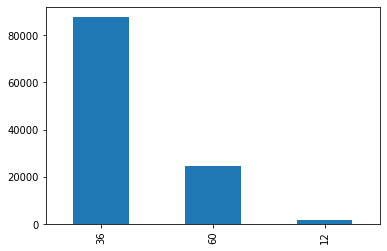

In [13]:
df_loan['Term'].value_counts().plot(kind='bar');

Three different time terms: 1- 36 months (most common), 2- 60 months, 3- 12 months (less common). Further we should analyse together other variables like Borrower Rating or Loan Original Amount, by itself this variable does not tell us too much things.

`LoanStatus` 

In [14]:
df_loan['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Here we have a summary of each Loan Status meaning, according to https://help.bitbond.com/article/20-the-10-loan-status-variants-explained website:

- **Currrent:** A loan can have the status ‘current’ when one or more payments have been completed and no payments are past due. It also means that this loan still has one or more scheduled future payments. 
- **Completed:** A ‘completed’ loan has been repaid in full including all principal and interest payments. 
- **Chargedoff:** After a loan has been defaulted we take action as described below. Once our actions and those of the debt collection agencies that we work with are completed, the loan is ‘charged off’. From this status everybody knows that no further action is taken on this loan and all dunning, collection and legal measures that are possible have been completed.
- **Defaulted:** When a loan has one or more payments that are overdue for over 120 days (in this case) the loan is considered as ‘defaulted’. After a loan has reached this status we decide individually what happens next.
- **Past Due:** When one or more payments of a loan are overdue for more than 15, 30, 60, 90 or 120 days.

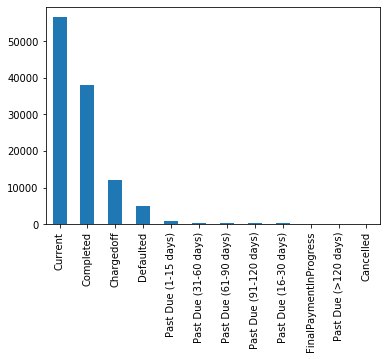

In [15]:
df_loan['LoanStatus'].value_counts().plot(kind='bar');

Most of loans has "Current", "Completed", "Chargedoff" or "Defaulted" status. "Past due" categories can be joined in a new single category.

In [16]:
df_loan['LoanStatus'].value_counts().index

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (16-30 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)', 'Cancelled'],
      dtype='object')

In [17]:
df_loan['LoanStatus'].value_counts().index[5][:8]

'Past Due'

In [18]:
#string assignment and count 
past_due = df_loan['LoanStatus'].value_counts().index[5][:8]
len(past_due)

8

In [19]:
# sum of all "Past Due" status in a single list
past_due_list = []
for index in df_loan['LoanStatus'].value_counts().index:
    if index[:8] == past_due:
        past_due_list.append(df_loan['LoanStatus'].value_counts()[index])
          
past_due_sum = sum(past_due_list )
past_due_sum

2067

In [20]:
# make a list with Current, Completed, Chargedoff values
loan_status_list = list(df_loan['LoanStatus'].value_counts()[0:4])
loan_status_list.append(past_due_sum)
loan_status_list

[56576, 38074, 11992, 5018, 2067]

In [21]:
# make a list with Current, Completed, Chargedoff column names
column_name = list(df_loan['LoanStatus'].value_counts().index[0:4])
column_name.append(past_due)
column_name

['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due']

In [22]:
# create an updated DataFrame with a new category Past Due
loan_status = pd.DataFrame(loan_status_list, column_name)
loan_status.rename(columns= {0:'Loan_Status_Count'}, inplace = True)
loan_status

,Loan_Status_Count
Current,56576
Completed,38074
Chargedoff,11992
Defaulted,5018
Past Due,2067


Then we have a barplot with the five main Loan Status categories:

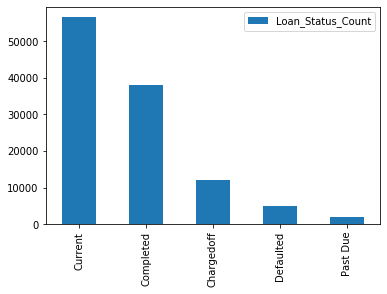

In [23]:
loan_status.plot(kind='bar');

Here we can make a new transformations joining Past Due, Defaulted and Charged Off into a new variable named **"Troubled Loans"**

In [24]:
# sum the ChargedOff, Defaulted and PastDue into a new variable
troubled_loans = sum(loan_status['Loan_Status_Count'][2:])
troubled_loans

19077

In [25]:
# create a new list with the total of each category and another list with the new
new_column_name = ['Current', 'Completed', 'Troubled Loans']
new_loan_status_list = [loan_status['Loan_Status_Count'][0], loan_status['Loan_Status_Count'][1], troubled_loans]
new_loan_status_list

[56576, 38074, 19077]

In [26]:
new_loan_status = pd.DataFrame(new_loan_status_list, new_column_name)
new_loan_status.rename(columns= {0:'Loan_Status_Count'}, inplace = True)
new_loan_status

,Loan_Status_Count
Current,56576
Completed,38074
Troubled Loans,19077


In [27]:
total_status = sum(new_loan_status['Loan_Status_Count'])
total_status

113727

In [28]:
new_loan_status['status_ratio'] = new_loan_status['Loan_Status_Count'] / total_status
new_loan_status

,Loan_Status_Count,status_ratio
Current,56576,0.497472
Completed,38074,0.334784
Troubled Loans,19077,0.167744


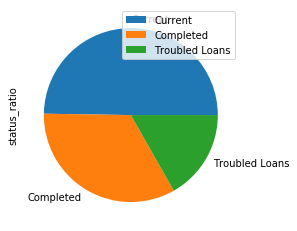

In [29]:
new_loan_status.plot(kind = 'pie',y = 'status_ratio');

Half of the Prosper's loans have the status **Current** (i.e: A loan when one or more payments have been completed and no payments are past due. It also means that this loan still has one or more scheduled future payments.)
One third are already completed and 16.77% have had some trouble. These 16.77% could be compared to other companies of the same field to know if Prosper has a high ratio of troubled loans. 

`BorrowerRate` - Histogram of the loan rates 

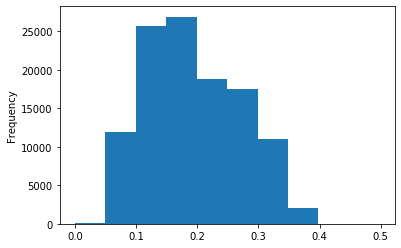

In [30]:
df_loan['BorrowerRate'].plot(kind='hist');

In [31]:
round(df_loan['BorrowerRate'].mean(),4)

0.1928

The mean of the interest rate is  19.28%. It can be analyzed with another variable further in a bivariate analysis with Borrower Rate and LoanOriginalAmount.

`ProsperRating (numeric)`:
According to Prosper Wikipedia: **"Prosper has provided a proprietary "Prosper Rating" for prospective borrowers based on the company's estimation of that borrower's "estimated loss rate."**

The  Prosper Rating assigned at the time the listing was created:
- 0: N/A
- 1: HR (Higher Risk)
- 2: E
- 3: D
- 4: C
- 5: B
- 6: A
- 7: AA (Applicable for loans originated after July 2009) - Lower 

In [32]:
sum(df_loan['ProsperRating (numeric)'].isnull())

29084

In [33]:
df_loan['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [34]:
prosper_rating_list = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

In [35]:
for i, v in enumerate(prosper_rating_list):
    print(i,v)

0 N/A
1 HR
2 E
3 D
4 C
5 B
6 A
7 AA


In [36]:
# create the edges of each category
bin_edges = np.arange(-1, 8, 1)

In [37]:
len(bin_edges)

9

In [38]:
# Creates ListingCategory column
df_loan['ProsperRating'] = pd.cut(df['ProsperRating (numeric)'], bin_edges, labels= prosper_rating_list)

# Checks for successful creation of this column
df_loan.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,ProsperRating
0,2007-08-26 19:09:29.263,36,Completed,2009-08-14,0.1580,NaN,0,CO,Self-employed,True,"$25,000-49,999",9425,NaN
1,2014-02-27 08:28:07.900,36,Current,NaT,0.0920,6.0,2,CO,Employed,False,"$50,000-74,999",10000,A
2,2007-01-05 15:00:47.090,36,Completed,2009-12-17,0.2750,NaN,0,GA,Not available,False,Not displayed,3001,NaN
3,2012-10-22 11:02:35.010,36,Current,NaT,0.0974,6.0,16,GA,Employed,True,"$25,000-49,999",10000,A
4,2013-09-14 18:38:39.097,36,Current,NaT,0.2085,3.0,2,MN,Employed,True,"$100,000+",15000,D


In [39]:
# now the value counts with the righ score instead a number
df_loan['ProsperRating'].value_counts()

C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
N/A        0
Name: ProsperRating, dtype: int64

N/A is the same of df_loan['ProsperRating].isnull() = 29084

This number of "Nan" makes these 29084 entries impossible to analyse. Analysing from the second most common rating we can say the rating measure is more useful in a bivariate and multivariate analyis, for now it can be said the **most common score is C.**

`ListingCategory` - Catgory that tells us why someone asked for a loan. Here we need a bar chart to have the sum of frequency of each category 
- 0 - Not Available
- 1 - Debt Consolidation 
- 2 - Home Improvement 
- 3 - Business 
- 4 - Personal Loan 
- 5 - Student Use 
- 6 - Auto 
- 7 - Other 
- 8 - Baby&Adoption
- 9 - Boat
- 10 - Cosmetic Procedure 
- 11 - Engagement Ring 
- 12 - Green Loans 
- 13 - Household Expenses 
- 14 - Large Purchases 
- 15 - Medical/Dental 
- 16 - Motorcycle 
- 17 - RV 
- 18 - Taxes 
- 19 - Vacation 
- 20 - Wedding Loans

In [40]:
category_list = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan',
                       'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 
                        'Engagement Ring', 'Green Loans', 'Household Expenses','Large Purchases', 'Medical/Dental',
                       'Motorcycle', 'RV', 'Taxes', 'Vacation', 'Wedding Loans']

In [41]:
for i, v in enumerate(category_list):
    print(i,v)

0 Not Available
1 Debt Consolidation
2 Home Improvement
3 Business
4 Personal Loan
5 Student Use
6 Auto
7 Other
8 Baby&Adoption
9 Boat
10 Cosmetic Procedure
11 Engagement Ring
12 Green Loans
13 Household Expenses
14 Large Purchases
15 Medical/Dental
16 Motorcycle
17 RV
18 Taxes
19 Vacation
20 Wedding Loans


In [42]:
# create the edges of each category
bin_edges = np.arange(-1, 21, 1)

In [43]:
# Creates ListingCategory column
df_loan['ListingCategory'] = pd.cut(df['ListingCategory (numeric)'], bin_edges, labels=category_list)

# Checks for successful creation of this column
df_loan.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,ProsperRating,ListingCategory
0,2007-08-26 19:09:29.263,36,Completed,2009-08-14,0.1580,NaN,0,CO,Self-employed,True,"$25,000-49,999",9425,NaN,Not Available
1,2014-02-27 08:28:07.900,36,Current,NaT,0.0920,6.0,2,CO,Employed,False,"$50,000-74,999",10000,A,Home Improvement
2,2007-01-05 15:00:47.090,36,Completed,2009-12-17,0.2750,NaN,0,GA,Not available,False,Not displayed,3001,NaN,Not Available
3,2012-10-22 11:02:35.010,36,Current,NaT,0.0974,6.0,16,GA,Employed,True,"$25,000-49,999",10000,A,Motorcycle
4,2013-09-14 18:38:39.097,36,Current,NaT,0.2085,3.0,2,MN,Employed,True,"$100,000+",15000,D,Home Improvement


In [44]:
df_loan['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

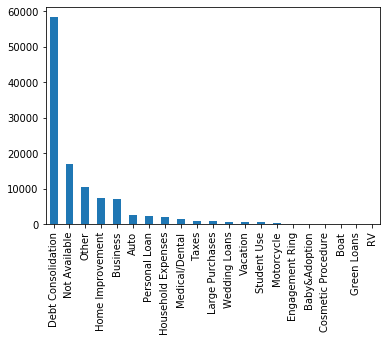

In [45]:
df_loan['ListingCategory'].value_counts().plot(kind='bar');

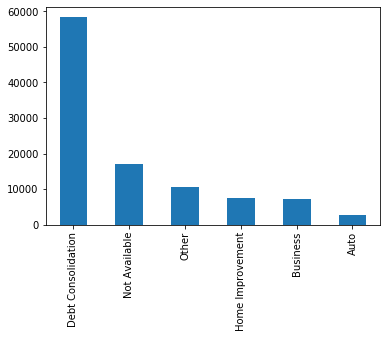

In [46]:
# now plot the six most common categories:
df_loan['ListingCategory'].value_counts()[0:6].plot(kind='bar');

- According to Wikipedia **Debt Consolidations** (the most common cause of loans in this dataset) is a **"form of debt refinancing that entails taking out one loan to pay off many others", which mean these loans were taken in order to resolve another debts!** 
- The second most common category is **"Not Available"** which implies in missing data.

`BorrowerState` - Bar chart 

In [47]:
df_loan['BorrowerState'].value_counts().shape[0]

51

There are loans in all the 50 american states + DC

Here it's a link with the meaning of each american state initial: https://www.50states.com/abbreviations.htm

In [48]:
df_loan['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

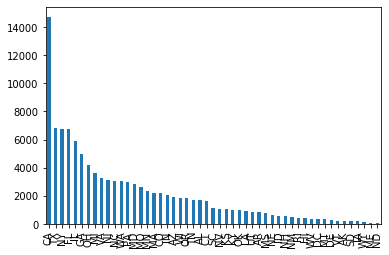

In [49]:
df_loan['BorrowerState'].value_counts().plot(kind='bar');

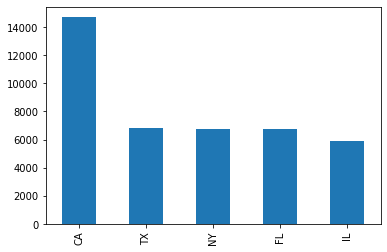

In [50]:
# Plot the 5 most common states
df_loan['BorrowerState'].value_counts()[0:5].plot(kind='bar');

California is the state with most loans (more than the double of the second, third and fourth states with more loans) followed by Texas, New York, Florida and Illinois. Focus more on the loans made in California.

`EmploymentStatus`

In [51]:
df_loan['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

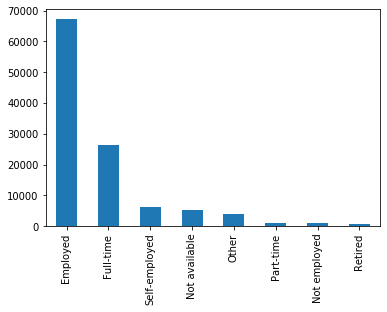

In [52]:
df_loan['EmploymentStatus'].value_counts().plot(kind='bar');

Employed are the most common category, retired is less common category of Employment Status. It can be made a analysis in order to discover how the loan interest rate is afected by each Employment Status.

`IsBorrowerHomeowner`

In [53]:
# Borrower Home Owner ratio
borrower_home_ratio = round(df_loan['IsBorrowerHomeowner'].value_counts() 
                            / df_loan['IsBorrowerHomeowner'].shape[0] *100,2)
borrower_home_ratio

True     50.45
False    49.55
Name: IsBorrowerHomeowner, dtype: float64

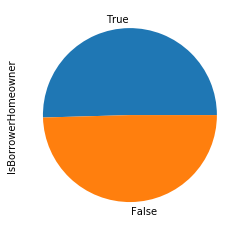

In [54]:
borrower_home_ratio.plot(kind='pie');

Almost 50%/50% division. Is there a different interest rate for each case?

`IncomeRange`

In [55]:
df_loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

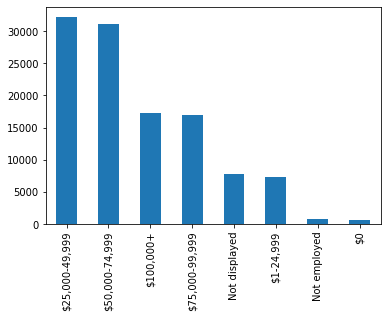

In [56]:
df_loan['IncomeRange'].value_counts().plot(kind='bar');

Most people have a income range between USD 25k- USD 50k closed followed by USD 50k- USD 75k range. In the bivariate exploration this column can be analysed with the interest rating.

`LoanOriginalAmount`

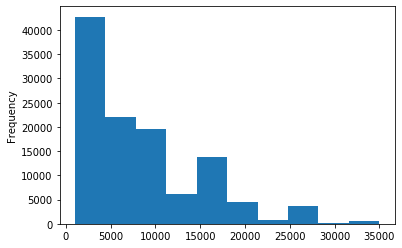

In [57]:
df_loan['LoanOriginalAmount'].plot(kind='hist');

Right skewed distribution. Most people ask for more than USD 40,000 when lending money at Prosper. Just a few people ask for less than USD 5,000. It can be analysed with the interest rate in a further bi and multivariate exploration

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- `Term`: Can be better analysed with another variables.

- `LoanStatus`: I found a better way to plot data joining all "Past Due" with different time into a new transformation with ChargedOff, Defaulted and Past Due joining into a new variable named Troubled. With this I discovered that next to 17% of loans have some kind of trouble.


- `ListingCategories`/`BorrowerStates`: For these these columns I found better focus on the six and five most common values, the most meaningful results.  

- `BorrowerRate`: A little right skewed distribution with a mean of 19,27% per annum.

- Most of data in this data set are qualitative, so the most common visualization in this analysis is the bar plot.

- In the interest rating histogram wasn't necessary adjust the bins numbers. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The variable type of date were wrong in the columns `ListingCreateDate` and `ClosedDate`. Both were changed to datetime.

- `ProsperRating`/`ListingCategory`: It was necessary create a new column using pd.cut pandas atribute for these two columns in order to allow see the value counts of each qualitative category

- No missing data ('Nan') were taken off of the dataset.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

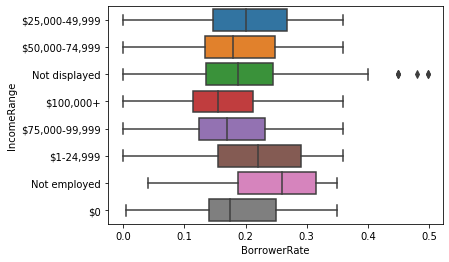

In [58]:
sns.boxplot(x = 'BorrowerRate', y = 'IncomeRange', data = df_loan);

Taking some insights from the univariate exploration we learnt most of loans were made by employed people. Here we see that people with income range between USD 25k - USD 50K (the most common) pay the average interest, while unemployed pay much more than this. People with income range USD 50k - USD 75k (the second most common) pay a liitle bit less. Those who earn more than USS100k/year are paying the smaller rates.

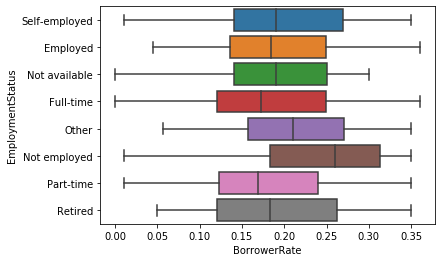

In [59]:
sns.boxplot(x = 'BorrowerRate', y = 'EmploymentStatus', data = df_loan);

Here we have someting very similar to the last plot, it also confirms that unemployed people pay interests much higher than the average.

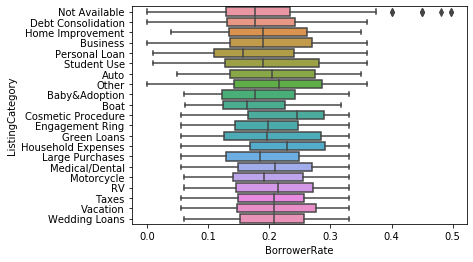

In [60]:
sns.boxplot(x = 'BorrowerRate', y = 'ListingCategory', data = df_loan);

Debt consolidation is the most common category as seen in the univariate exploration. The higher interest taxes are paid by people in the third quartile of categories like Household Expenses and Cosmetic Procedures. They pay the higher interest taxes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most common Income Range of people which made a loan at Prosper (from USD 25k to USD 50k) also pay the average interest rating. It was also possible to notice that not employed people pay the higher taxes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Household and Cosmetic Procedures are not common categories (as seen in the univariate exploration), but they pay higher taxes in general.

## Multivariate Exploration

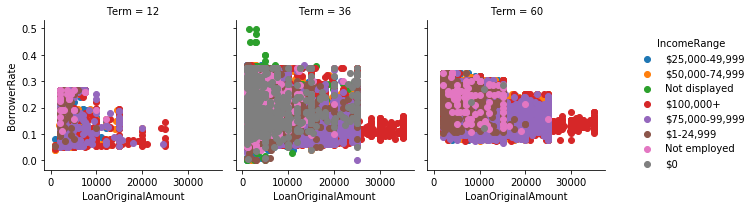

In [61]:
g = sns.FacetGrid(data = df_loan, col = 'Term', margin_titles = True, hue = 'IncomeRange')
(g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate').add_legend());

- Loan Amounts higher than USD 25,5k are always made by people with the highest income range USD 100k.
- Most of unemployed people ask a 60 month loan term.
- The most common income range people (USD 25k to USD 50k) ask for a 12 loan term.
- People with no income asks more for a 36 month loan term.

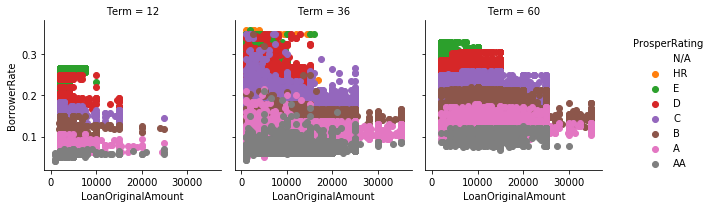

In [62]:
g = sns.FacetGrid(data = df_loan, col = 'Term', margin_titles = True, hue = 'ProsperRating')
(g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate').add_legend());

- High Risk (HR) pay about 40% interest per annum, people with this rating always ask a 36 month loan term.
- The longer the loan term, higher is the interest rate.
- There are some people AA rating paying higher interest than a B or C when in the 36 loan term.

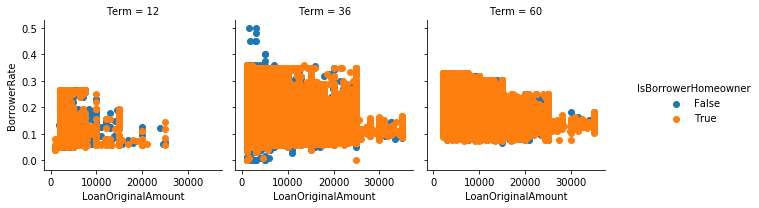

In [63]:
g = sns.FacetGrid(data = df_loan, col = 'Term', margin_titles = True, hue = 'IsBorrowerHomeowner')
(g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate').add_legend());

- Home owners aks for a higher amount of money.
- Those who does not own a home pay much higher interests, even for small amounts when in a 36 loan term.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The relationship between income range, interest rate and loan amount are really strong. People with more money asks more money in a loan and pay the lowest taxes whatever is the term. 
- Unemployed people pay the highest interest rates and have the longest terms in general, even when don't ask for much money.
- Home owners tend to ask for much more money than those who rent a place to live.

### Were there any interesting or surprising interactions between features?

- People with a good Rating paying high interest rates!

In [64]:
# save the reduced dataset (df_loan) into a new csv file
df_loan.to_csv('prosperLoanDataReduced.csv',index=False)